In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tikzplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 808.8 kB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tikzplotlib

In [4]:
df = pd.read_csv("/content/drive/MyDrive/data/generator_training_data.csv")

df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,hotel_url,date,rating,title,text
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2019-01-01,5.0,Xmas holiday,We went here with our kids for Xmas holiday an...
1,Hotel_Review-g147425-d248380-Reviews-Tiamo_Res...,2010-04-01,5.0,Perfect tranquil break.,We have just returned from a wonderful holiday...
2,Hotel_Review-g551934-d568713-Reviews-Ben_More_...,2015-09-01,4.0,Superb overnight stay,"Stayed overnight on tour, lodge was clean/comp..."
3,Hotel_Review-g181750-d253066-Reviews-Inn_On_Th...,2016-01-01,5.0,Beautiful inn in a charming town,"Great desk staff, excellent beds. We stayed in..."
4,Hotel_Review-g293974-d294909-Reviews-Kalyon_Ho...,2010-09-01,3.0,Very noisy hotel,At 2.00 in the morning somebody from a close r...


In [6]:
df['date'].dt.year.value_counts().sort_index()

2002       1
2003      18
2004      38
2005      96
2006     125
2007     196
2008     255
2009     450
2010     621
2011    1060
2012    1647
2013    2445
2014    2812
2015    3471
2016    4111
2017    3703
2018    3054
2019     897
Name: date, dtype: int64

The tikzplotlib can be used to export plots to the .tex format. This is used for easier workflow implementing these plots into the final paper.

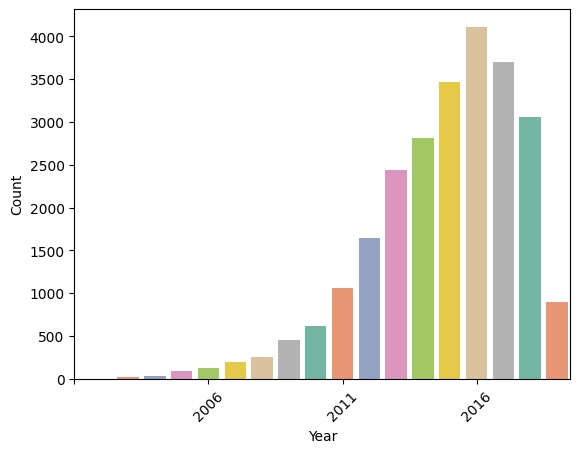

In [7]:
plt.figure()
ax = sns.countplot(data=df, x=df['date'].dt.year, palette='Set2')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xticks([tick - 1 for tick in ax.get_xticks() if tick % 5 == 0])
plt.xticks(rotation=45)
#plt.show()
tikzplotlib.save("/content/drive/MyDrive/tex_files/year_dist.tex")

Seeing the distribution of ratings:

In [ ]:
df['rating'].value_counts().sort_index()

1.0     1219
2.0     1233
3.0     2829
4.0     6730
5.0    12989
Name: rating, dtype: int64

Visualisation:

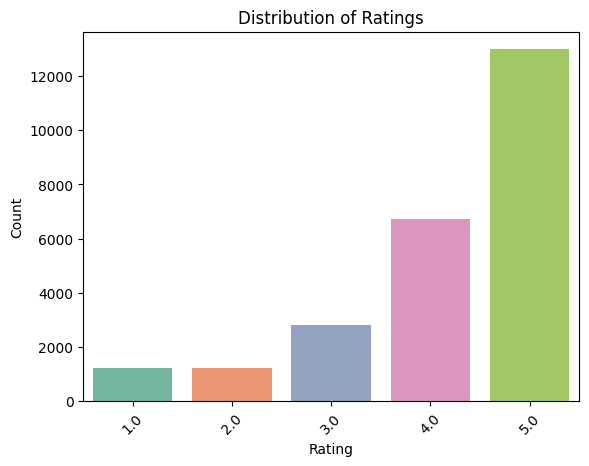

In [8]:
plt.figure()
sns.countplot(data=df, x=df['rating'], palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

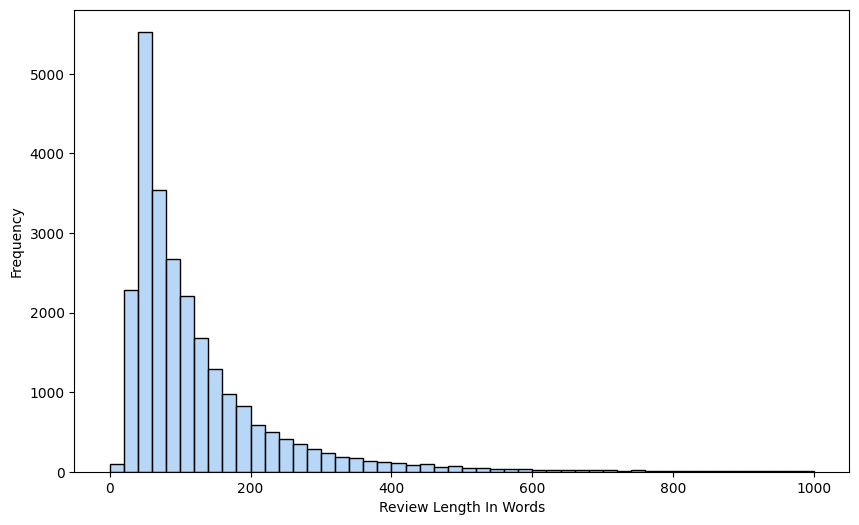

In [20]:
plt.figure(figsize=(10, 6))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x=df['word_count'], bins=50, color=sns.color_palette("pastel")[0], binrange=(0, 1000))
plt.xlabel("Review Length In Words")
plt.ylabel("Frequency")
tikzplotlib.save("/content/drive/MyDrive/tex_files/review_length_dist.tex")
#plt.show()